In [81]:
import json
import pandas as pd

#from bs4 import BeautifulSoup
import requests
from collections import Counter
from matplotlib import pyplot

#### Data obtained from InfoJobs website API

In [5]:
def todict(fstring):
    with open(fstring) as f:
        return json.loads(f.read(), strict=False)

In [6]:
#data = todict('jobs12.txt')

#### Json Parsing to Dataframe 

In [43]:
job_base = {}
folder = 'job_records/'
for i in range(12):
    data = todict(f'{folder}jobs{i+1}.txt')
    for item in data['items']:
        job_base[item['id']] = item

In [44]:
#total num of current offers for Barcelona province, to be enlarged periodically
len(job_base)# results 29-01-21

5878

In [45]:
jobsDF = pd.DataFrame(job_base).T

In [46]:
jobsDF['provincia'] = [jobsDF['province'].iloc[x]['value'] for x in range(len(jobsDF))]
jobsDF['categoria'] = [jobsDF['category'].iloc[x]['value'] for x in range(len(jobsDF))]
jobsDF['subcategoria'] = [jobsDF['subcategory'].iloc[x]['value'] for x in range(len(jobsDF))]
jobsDF['estudios'] = [jobsDF['study'].iloc[x]['value'] for x in range(len(jobsDF))]

In [47]:
jobsDF.drop(['province','link','contractType',
       'salaryMin', 'salaryMax', 'salaryPeriod',
       'experienceMin', 'workDay', 'author',
       'requirementMin', 'bold', 'applications', 'executive',
       'salaryDescription', 'urgent', 'color', 'category', 'subcategory', 'study', 'subSegment'], axis=1, inplace=True)

#### DataFrame 

In [62]:
jobsDF = jobsDF.reset_index().drop(['index'], axis=1)
jobsDF.head()

,id,title,city,published,updated,provincia,categoria,subcategoria,estudios
0,2f59b39ce0491e9259073171e05ef5,Jefe turno de tarde en Inyección de plástico,Palau-Solità I Plegamans,2021-01-29T16:13:58.000Z,2021-01-29T16:13:58.000Z,Barcelona,Ingenieros y técnicos,Industrial,Formación Profesional Grado Medio
1,e212dce48e45c5b33bd404ac8d3c82,BackOffice Comercial Energía (luz/gas),Barberà Del Vall??s,2021-01-25T15:20:36.000Z,2021-01-29T16:13:51.000Z,Barcelona,Comercial y ventas,Comercial,Formación Profesional Grado Medio
2,bd76b43a3346e6bd7ff44b5d956ffa,Gerente inmobiliario,Barcelona,2021-01-18T08:50:27.000Z,2021-01-29T16:13:38.000Z,Barcelona,Inmobiliario y construcción,Administración inmobiliaria,Formación Profesional Grado Medio
3,d1080414244327867fcb808604cb5d,"Part time, Independent Contractor, Work from H...",Spain,2021-01-29T16:10:29.000Z,2021-01-29T16:10:29.000Z,Barcelona,Informática y telecomunicaciones,Sistemas,Sin estudios
4,fde452962946ce8ffb596c3891ebeb,Mechanical Loads Engineer H/F,Barcelona,2021-01-29T16:08:37.000Z,2021-01-29T16:08:37.000Z,Barcelona,Ingenieros y técnicos,Electrónica y automática industrial,Ingeniería Técnica


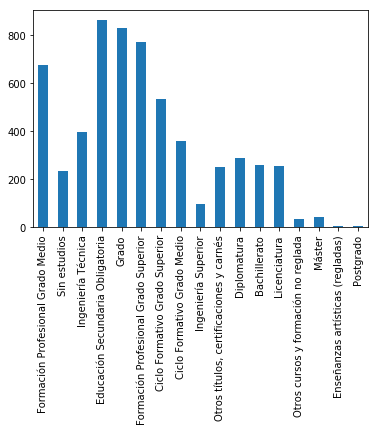

In [61]:
pd.Series(Counter(jobsDF.estudios)).plot(kind='bar')

In [84]:
#sorted per job offer number
pd.Series(Counter(jobsDF.city)).nlargest(20)

Barcelona                    2697
Granollers                    161
Sant Cugat Del Vall??s        160
Sabadell                      155
Terrassa                      141
Manresa                       107
Badalona                       98
Cornellà De Llobregat          88
Mataró                         83
Rubí                           81
Martorell                      79
El Prat De Llobregat           78
L'Hospitalet De Llobregat      74
Vic                            60
Mollet Del Vall??s             55
Barberà Del Vall??s            53
Cerdanyola Del Vall??s         52
Sant Joan Despí                48
Castellbisbal                  47
Sant Boi De Llobregat          45
dtype: int64

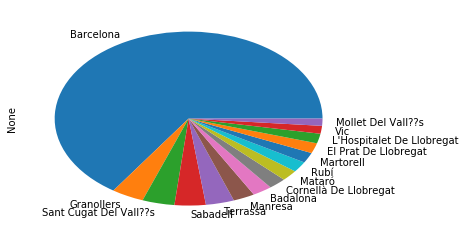

In [79]:
#plot 15 largest 
pd.Series(Counter(jobsDF.city)).nlargest(15).plot(kind='pie')
#podria agregar por comarca o area metropolitana

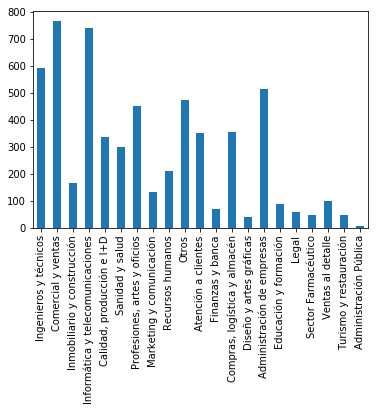

In [69]:
pd.Series(Counter(jobsDF.categoria)).plot(kind='bar')

In [80]:
#10 largest subcategories
pd.Series(Counter(jobsDF.subcategoria)).nlargest(10)

Sin especificar            476
Comercial                  421
Atención al cliente        324
Programación               275
Industrial                 271
Administración             203
Finanzas y contabilidad    165
Agente comercial           157
Otros oficios              154
Almacén                    148
dtype: int64

In [ ]:
#https://www.infojobs.net/jobsearch/search-results/list.xhtml?provinceIds=9

In [115]:
#apicall = 'http://api.infojobs.net/api/7/offer?province=barcelona&page=1&page=1&maxResults=500'

### Beautiful soup

In [82]:
#webscrapping

In [262]:
#link = 'https://www.infojobs.net/ofertas-trabajo/barcelona/barcelona'
#link = 'https://www.infojobs.net/jobsearch/search-results/list.xhtml'
#link = 'https://www.infojobs.net/jobsearch/search-results/list.xhtml?id=40296499200&dgv=8546260194329870832'

In [64]:
#query = f'list.xhtml?provinceIds=9&cityIds=Barcelona&educationIds=55&page={pagenum}'

In [65]:
#page = requests.get(api)
#page

In [66]:
#<ul class="ij-ComponentList">

In [67]:
#soup = BeautifulSoup(page, 'html.parser')